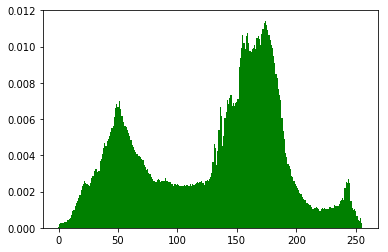

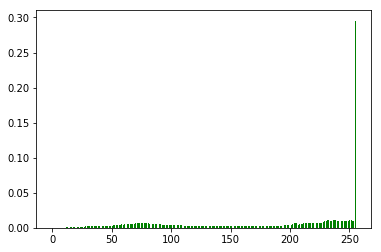

-1

In [5]:
#增加亮度
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = np.zeros(img.shape,np.uint8)
dst_gray = np.zeros((height,width,1),np.uint8)
count = np.zeros(256,np.float32)
rflxChange = 50#改变量百分比，确定图像的直方图伸缩比例，为主要参数
rflxChange /= 100


for i in range(0,height):#计算概率分布
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index]+=1
     
    
for i in range(0,256):#归一化
    count[i] /=height*width
sumCount = float(0)
newCount = np.zeros(256,np.float32)
for i in range(0,255):#概率分布积分
    sumCount+=count[i]
    newCount[i]=sumCount
    
    
area_mid = 0   #增加亮度     
for i in range(0,height):#计算映射表及映射
    for j in range(0,width):
        newGray=area_mid-(area_mid-gray[i,j])*(1+rflxChange)
        if newGray > 255:
            newGray=255
        if newGray < 0:
            newGray=0
        dst_gray[i,j]=newGray
        
        
for i in range(0,height):#GRAY2BGR
    for j in range(0,width):
        (b,g,r) = img[i,j]
        if gray[i,j]!=0:
            b*= dst_gray[i,j]/gray[i,j]
            g*= dst_gray[i,j]/gray[i,j]
            r*= dst_gray[i,j]/gray[i,j]
            if b>255:
                b=255
            if b<0:
                b=0
            if g>255:
                g=255
            if g<0:
                g=0
            if r>255:
                r=255
            if r<0:
                r=0
        dst[i,j] = (b,g,r)


count = np.zeros(256,np.float32)#输出原图直方图
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index]+=1
for i in range(0,256):
    count[i] /=height*width
x = np.linspace(0,255,256)#0-255,256等分
y = count
plt.bar(x,y,1.0,alpha=1,color='g')
plt.show()
plt.figure()


count = np.zeros(256,np.float32)#输出新图直方图
for i in range(0,height):
    for j in range(0,width):
        pixel = dst_gray[i,j]
        index = int(pixel)
        count[index]+=1
for i in range(0,256):
    count[i] /=height*width
x = np.linspace(0,255,256)#0-255,256等分
y = count
plt.bar(x,y,1.0,alpha=1,color='g')
plt.show()

        
cv2.imshow('dst',dst)
cv2.imshow('src',img)
cv2.imwrite('high.jpg',dst)
cv2.waitKey(0)

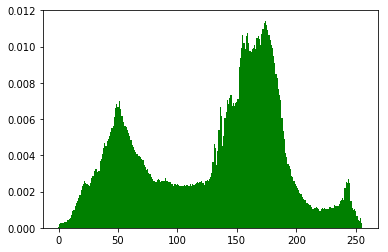

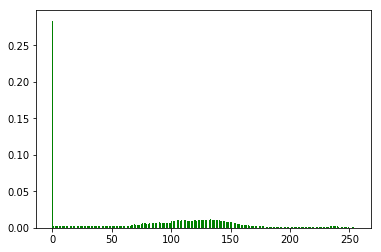

-1

In [7]:
#降低亮度
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = np.zeros(img.shape,np.uint8)
dst_gray = np.zeros((height,width,1),np.uint8)
count = np.zeros(256,np.float32)
rflxChange = 50#改变量百分比，确定图像的直方图伸缩比例，为主要参数
rflxChange /= 100


for i in range(0,height):#计算概率分布
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index]+=1
     
    
for i in range(0,256):#归一化
    count[i] /=height*width
sumCount = float(0)
newCount = np.zeros(256,np.float32)
for i in range(0,255):#概率分布积分
    sumCount+=count[i]
    newCount[i]=sumCount
    
    
area_mid = 255   #降低亮度     
for i in range(0,height):#计算映射表及映射
    for j in range(0,width):
        newGray=area_mid-(area_mid-gray[i,j])*(1+rflxChange)
        if newGray > 255:
            newGray=255
        if newGray < 0:
            newGray=0
        dst_gray[i,j]=newGray
        
        
for i in range(0,height):#GRAY2BGR
    for j in range(0,width):
        (b,g,r) = img[i,j]
        if gray[i,j]!=0:
            b*= dst_gray[i,j]/gray[i,j]
            g*= dst_gray[i,j]/gray[i,j]
            r*= dst_gray[i,j]/gray[i,j]
            if b>255:
                b=255
            if b<0:
                b=0
            if g>255:
                g=255
            if g<0:
                g=0
            if r>255:
                r=255
            if r<0:
                r=0
        dst[i,j] = (b,g,r)


count = np.zeros(256,np.float32)#输出原图直方图
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index]+=1
for i in range(0,256):
    count[i] /=height*width
x = np.linspace(0,255,256)#0-255,256等分
y = count
plt.bar(x,y,1.0,alpha=1,color='g')
plt.show()
plt.figure()


count = np.zeros(256,np.float32)#输出新图直方图
for i in range(0,height):
    for j in range(0,width):
        pixel = dst_gray[i,j]
        index = int(pixel)
        count[index]+=1
for i in range(0,256):
    count[i] /=height*width
x = np.linspace(0,255,256)#0-255,256等分
y = count
plt.bar(x,y,1.0,alpha=1,color='g')
plt.show()

        
cv2.imshow('dst',dst)
cv2.imshow('src',img)
cv2.imwrite('low.jpg',dst)
cv2.waitKey(0)

In [8]:
#hdr
import cv2
import numpy as np
img0 = cv2.imread('high.jpg',1)
img1 = cv2.imread('low.jpg',1)
img = cv2.imread('1.jpg',1)
imgInfo = img0.shape
height = imgInfo[0]
width = imgInfo[1]
#定义感兴趣范围
roiH = int(height)
roiW = int(width)
img0ROI = img0[0:roiH,0:roiW]
img1ROI = img1[0:roiH,0:roiW]
dst = np.zeros((roiH,roiW,3),np.uint8)
dst = cv2.addWeighted(img0ROI,0.5,img1ROI,0.5,0)#dst=src1*a+src2*(1-a)
cv2.imwrite('hdr.jpg',dst)
dst = cv2.addWeighted(dst,0.55,img,0.45,0)
cv2.imshow('hdr',dst)
cv2.imwrite('hdr2.jpg',dst)
cv2.waitKey(0)

-1